In [1]:
using FastAI
using FastAI.Datasets
using CairoMakie

┌ Info: Precompiling FastAI [5d0beca9-ade8-49ae-ad0b-a3cf890e669f]
└ @ Base loading.jl:1313
┌ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
└ @ Base loading.jl:1313


In [2]:
taskdata = Datasets.loadtaskdata(Datasets.datasetpath("camvid_tiny"), FastAI.ImageSegmentationTask);

In [3]:
method = ImageSegmentation(Datasets.getclassessegmentation("camvid_tiny"), (96, 128));

In [4]:
trainds = methoddataset(taskdata, method, Training())
summary.(getobs(trainds, 1))

("96×128×3 Array{Float32, 3}", "96×128×32 Array{Float32, 3}")

In [5]:
traindl, valdl = methoddataloaders(taskdata, method);

In [51]:
xs, ys = batch = first(traindl)
summary.((xs, ys))

("96×128×3×16 Array{Float32, 4}", "96×128×32×16 Array{Float32, 4}")

┌ Info: Makie/AbstractPlotting is caching fonts, this may take a while. Needed only on first run!
└ @ AbstractPlotting /home/lorenz/.julia/packages/AbstractPlotting/xF8rX/src/utilities/texture_atlas.jl:115


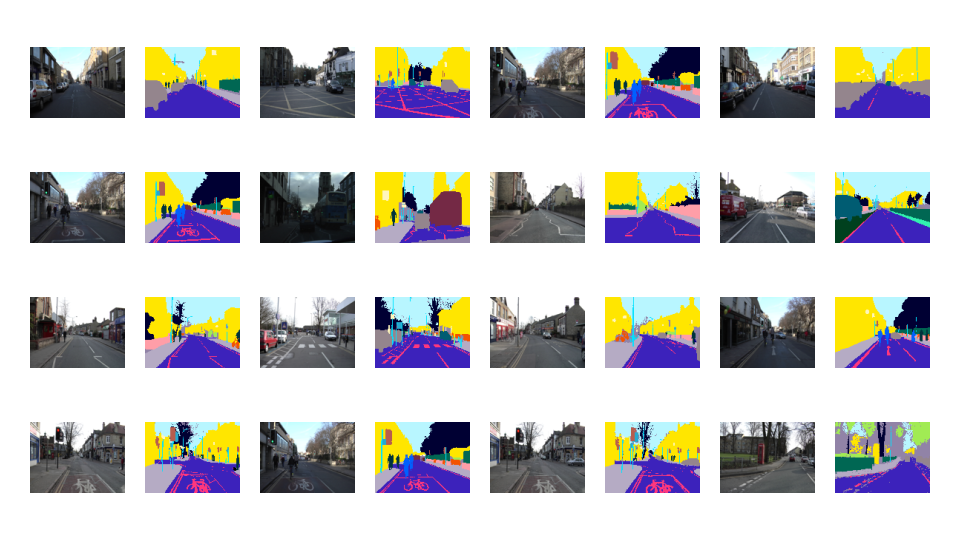

In [7]:
FastAI.plotbatch(method, (xs, ys))

In [13]:
learner = methodlearner(method, taskdata, Models.xresnet18())

LoadError: MethodError: no method matching methodlossfn(::ImageSegmentation{2})
Closest candidates are:
  methodlossfn(!Matched::ImageClassification) at /home/lorenz/.julia/dev/FastAI/src/methods/imageclassification.jl:117